<a href="https://colab.research.google.com/github/pichaicpc/colab/blob/main/AI_week07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **บทที่ 7 คอมพิวเตอร์วิชัน**

* 7.1 แนะนำคอมพิวเตอร์วิชัน
* 7.2 การตรวจจับวัตถุ (Object Detection)
* 7.3 การตรวจจับใบหน้า (Face Detection)
* 7.4 การรู้จำใบหน้า (Face recognition )


# **7.1 แนะนำคอมพิวเตอร์วิชัน**

> **ภาพที่ 7.1 ตัวอย่างภาพที่มีการใช้เทคนิคการตรวจจับวัตถุ**

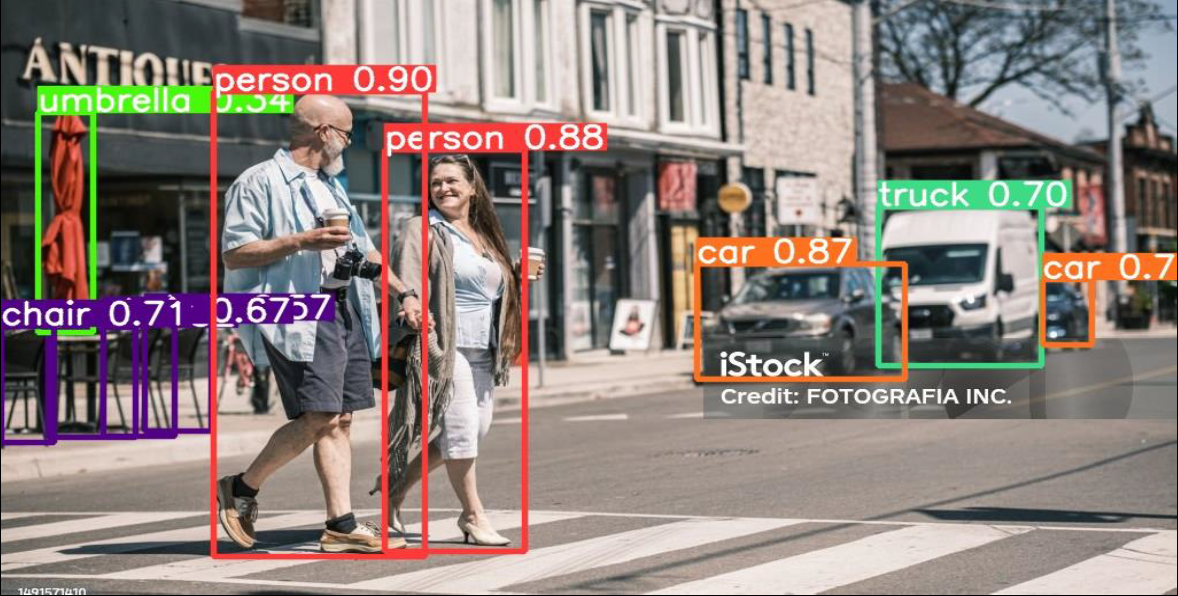

**Image Dataset**

[CIFAR-10] https://www.kaggle.com/datasets/swaroopkml/cifar10-pngs-in-folders </br>
[Celebrity] https://www.kaggle.com/datasets/vishesh1412/celebrity-face-image-dataset

In [ ]:
#ดาวโหลดไฟล์จาก
#https://drive.google.com/drive/folders/1UXX1WFP1n60X7w1TE9Kn0cc-iHIEJxEz?usp=sharing
#ไปไว้ในโฟลเดอร์ image

#กรณีใช้งานบน google colab
#ให้ดาวน์โหลดไฟล์ไปไว้ใน google drive แล้วทำการ Mount ดังนี้
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/image/'

In [ ]:
#ติดตั้ง Tensorflow
!pip install tensorflow

# **7.2 การจำแนกวัตถุ (Object Classification)**

> **ภาพที่ 7.2 ภาพวัตถุสำหรับการจำแนกวัตถุ**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the training dataset.
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "image/cifar10/train", labels="inferred", image_size=(224, 224), batch_size=100
)
class_labels = train_dataset.class_names


# Iterate over the dataset and extract data.
for images, labels in train_dataset:

    print('image size:', images.shape)  # Output: (100, 224, 224, 3)
    print('label size:', labels.shape)  # Output: (100,)
    break


plt.figure(figsize=(10,4))
classes = []
count = 0
for i in range(len(images)):

    if(labels[i].numpy() not in classes):
        count = count + 1

        classes.append(labels[i].numpy())
        plt.subplot(2,5,count)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].numpy().astype(int))
        #plt.imshow(x_test_gray[i], cmap='gray')
        plt.xlabel(class_labels[labels[i].numpy()])

        if(len(classes) == 10):
            break

plt.show()

> **ภาพที่ 7.3 ซอร์สโค้ดสำหรับการจำแนกวัตถุ**

In [ ]:
#Import Python Library
import tensorflow as tf

#Load Data
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "image/cifar10/train",labels="inferred",
    image_size=(224, 224), batch_size=100)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "image/cifar10/test",labels="inferred",
    image_size=(224, 224))

# Build the model.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(train_dataset.class_names),
                          activation="softmax")
])

#Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#Train Model
model.fit(train_dataset, epochs=1, verbose=0)

#Evaluate Model
_, test_acc = model.evaluate(test_dataset, verbose=0)
print("Accuracy:", round(test_acc * 100, 2), "%")

#Save Model
model.save("model.h5")

#Save Class labels to labels.txt file
with open("labels.txt", "w") as file:
    for label in train_dataset.class_names:
        file.write(label + "\n")

> **ภาพที่ 7.4 ซอร์สโค้ดสำหรับการนำเอาโมเดลการจำแนกวัตถุไปใช้งาน**

In [ ]:
import tensorflow as tf

# Load the image.
image = tf.keras.preprocessing.image.load_img(
        "image/cifar10/test/airplan/0003.png", target_size=(224, 224))

# Convert the image to a NumPy array.
image = tf.keras.preprocessing.image.img_to_array(image)

# Expand the dimensions of the image to add a batch dimension.
image = tf.expand_dims(image, axis=0)

# Load model
model = tf.keras.models.load_model('model.h5')

# Make a prediction.
predictions = model.predict(image, verbose=0)

# Get the predicted class.
predicted_class = tf.argmax(predictions, axis=1).numpy()[0]

# Load class labels
class_labels = []
with open("labels.txt", "r") as file:
    for line in file:
        class_labels.append(line.strip())

# Print the predicted class label.
print("Class Lable:", class_labels[predicted_class])

# Print confidence score
confidence_score = predictions[0][predicted_class]
print("Confidence Score:", round(confidence_score * 100, 2), "%")

Class Lable: horse
Confidence Score: 95.85 %


# **7.3 การรู้จำใบหน้า (Face recognition )**

> **ภาพที่ 7.5 ภาพใบหน้าสำหรับการรู้จำใบหน้า**

Found 800 files belonging to 10 classes.
image size: (100, 224, 224, 3)
label size: (100,)


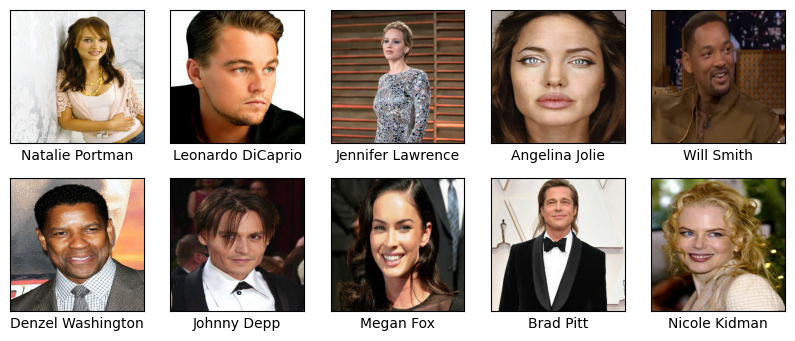

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the training dataset.
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "image/celeb/train",
    labels="inferred", image_size=(224, 224), batch_size=100
)
class_labels = train_dataset.class_names

# Iterate over the dataset and extract data.
for images, labels in train_dataset:

    print('image size:', images.shape)  # Output: (100, 224, 224, 3)
    print('label size:', labels.shape)  # Output: (100,)
    break


plt.figure(figsize=(10,4))
classes = []
count = 0
for i in range(len(images)):

    if(labels[i].numpy() not in classes):
        count = count + 1

        classes.append(labels[i].numpy())
        plt.subplot(2,5,count)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].numpy().astype(int))
        #plt.imshow(x_test_gray[i], cmap='gray')
        plt.xlabel(class_labels[labels[i].numpy()])

        if(len(classes) == 10):
            break

plt.show()

> **ภาพที่ 7.6 ซอร์สโค้ดสำหรับการรู้จำใบหน้า**

In [ ]:
#Import Python Library
import tensorflow as tf

#Load Data
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "image/celeb/train",labels="inferred",
    image_size=(224, 224), batch_size=100)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "image/celeb/test",labels="inferred",
    image_size=(224, 224))

# Build the model.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(train_dataset.class_names),
                          activation="softmax")
])

#Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#Train Model
model.fit(train_dataset, epochs=1, verbose=0)

#Evaluate Model
_, test_acc = model.evaluate(test_dataset, verbose=0)
print("Accuracy:", round(test_acc * 100, 2), "%")

#Save Model
model.save("model.h5")

#Save Class labels to labels.txt file
with open("labels.txt", "w") as file:
    for label in train_dataset.class_names:
        file.write(label + "\n")

Found 800 files belonging to 10 classes.
Found 200 files belonging to 10 classes.


Accuracy: 10.0 %


> **ภาพที่ 7.7 ซอร์สโค้ดสำหรับการนำเอาโมเดลการรู้จำใบหน้าไปใช้งาน**

In [ ]:
import tensorflow as tf

# Load the image.
image = tf.keras.preprocessing.image.load_img(
        "image/celeb/test/Nicole Kidman/003_98a0852a.jpg", target_size=(224, 224))

# Convert the image to a NumPy array.
image = tf.keras.preprocessing.image.img_to_array(image)

# Expand the dimensions of the image to add a batch dimension.
image = tf.expand_dims(image, axis=0)

# Load model
model = tf.keras.models.load_model('model.h5')

# Make a prediction.
predictions = model.predict(image, verbose=0)

# Get the predicted class.
predicted_class = tf.argmax(predictions, axis=1).numpy()[0]

# Load class labels
class_labels = []
with open("labels.txt", "r") as file:
    for line in file:
        class_labels.append(line.strip())

# Print the predicted class label.
print("Class Lable:", class_labels[predicted_class])

# Print confidence score
confidence_score = predictions[0][predicted_class]
print("Confidence Score:", round(confidence_score * 100, 2), "%")

Class Lable: Jennifer Lawrence
Confidence Score: 100.0 %


> **ภาพที่ 7.8 ซอร์สโค้ดสำหรับการนำเอาโมเดลการรู้จำใบหน้าไปใช้งานผ่านเว็บแคม**

In [ ]:
#Import Python Package
import tensorflow as tf
import cv2 as cv
import numpy as np

#Load Model
model = tf.keras.models.load_model('model.h5')

#Load Class labels
class_labels = []
with open("labels.txt", "r") as file:
    for line in file:
        class_labels.append(line.strip())

#Turn on Webcam
cap = cv.VideoCapture(0)

#Fetch each frame (image) from the webcam
while cap.isOpened():
    ret, image = cap.read() #Read a frame
    if not ret: break #Exit while loop when ret is false

    #Resize
    image = cv.resize(image, (224, 224), interpolation=cv.INTER_AREA)

    #Convert BGR to RGB color
    image_predict = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    #Expand dimensions of the image to add a batch dimension.
    image_predict = tf.expand_dims(image_predict, axis=0)

    #Make a prediction.
    predictions = model.predict(image_predict, verbose=0)

    #Get the predicted class.
    predicted_class = tf.argmax(predictions, axis=1).numpy()[0]

    #Get the predicted class label.
    class_name = class_labels[predicted_class]

    #Get the confidence score
    confidence_score = predictions[0][predicted_class]
    confidence_score = str(np.round(confidence_score * 100)) + "%"

    #Add a class name and it's confident score
    font = cv.FONT_HERSHEY_SIMPLEX
    cv.putText(image, class_name, (50,15), font, 0.5, (0,255,0),
               1,cv.LINE_AA)
    cv.putText(image, confidence_score, (80,30), font, 0.5, (0,255,0),
               1,cv.LINE_AA)

    #Show the image in a window
    cv.imshow("Webcam Image", image)

    #Exit while loop when a user presses "q" on the keyboard
    if cv.waitKey(1) == ord('q'):
        break

cap.release() #Release memory of cap variable
cv.destroyAllWindows()#Close all windows

# **7.4 การตรวจจับวัตถุ (Object Detection)**

> **ภาพที่ 7.9 การติดตั้งโยโลเวอร์ชันที่ 5**

In [ ]:
#Download Yolo5
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


> **ภาพที่ 7.10 การติดตั้งไลบรารีที่จำเป็นต่อการใช้งานโยโล**

> **ภาพที่ 7.11 การเข้าถึงโฟลเดอร์ของโยโล และการติดตั้ง Library ที่จำเป็น**

In [ ]:
#Enter into yolov5 folder
%cd yolov5

In [ ]:
#Install all libraries as listed in requirements.txt
%pip install -qr requirements.txt

> **ภาพที่ 7.12 การตรวจจับวัตถุด้วยโยโล**

In [ ]:
#Detect an image
!python detect.py --source "images/city.png" --weights yolov5s.pt

> **ภาพที่ 7.14 การตรวจจับวัตถุผ่านเว็บแคมด้วยโยโล**

In [ ]:
!python detect.py --source 0 --weights yolov5s.pt

#**7.5 การตรวจจับใบหน้า (Face Detection)**

> **ภาพที่ 7.15 ซอร์สโค้ดสำหรับการตรวจจับใบหน้าด้วยโอเพนซีวี**

In [ ]:
#XML file for OpenCV:
#https://drive.google.com/drive/folders/1UruCqrLlKFA4uCcNShi7wpFGPvvHE3Dm?usp=sharing

#Import Python Package
import cv2 as cv

#Load Pre-trained Model
face_cascade = cv.CascadeClassifier('xml/haarcascade_frontalface_default.xml')

#Load image data and change to gray scale
image = cv.imread('image/thai_celeb.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

#Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1)

#for(x_first_point, y_first_point, width, high)
for (x ,y, w, h) in faces:
    #cv.rectangle(image, (x_first_point, y_first_point),
    #(x_second_point, y_second_point), (B, G, R), thickness)
    image = cv.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv.imshow('image',image)

cv.waitKey(0)#Exit when a user presses any keys on the keyboard
cv.destroyAllWindows()#Close all windows

> **ภาพที่ 7.17 ซอร์สโค้ดสำหรับการตรวจจับใบหน้าผ่านเว็บแคมด้วยโอเพนซีวี**

In [ ]:
#Import Python Package
import cv2 as cv

#Load Pre-trained Model
object_cascade=cv.CascadeClassifier('xml/haarcascade_frontalface_default.xml')

#Turn on Webcam
cap = cv.VideoCapture(0)

#Fetch each frame (image) from the webcam
while cap.isOpened():

    ret, frame = cap.read() #read a frame
    if not ret: break #exit while loop when ret is false

    #frame = cv.resize(frame,None,fx=0.5, fy=0.5)
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    #Detect faces
    objects = object_cascade.detectMultiScale(gray, 1.9)

    #Fetch each face
    for (x,y,w,h) in objects:
        frame = cv.rectangle(frame, (x, y), (x+w, y+h), (255,0,0), 2)
        cv.imshow('frame', frame)


    #Exit while loop when a user presses "q" on the keyboard
    if cv.waitKey(1) == ord('q'):
        break

cap.release() #release memory of cap variable
cv.destroyAllWindows()#close all windows